# MLE and errors

In [4]:
import numpy as np
from scipy import integrate, stats, interpolate
from toolbox import vis
from toolbox import as_toolbox as ast
import urllib
import matplotlib.pyplot as plt
import importlib as il
from iminuit import Minuit
import toolbox
from scipy import optimize
from toolbox.ExternalFunctions import UnbinnedLH

ModuleNotFoundError: No module named 'sympy'

# Ex. 1 

# Ex. 2 

In [4]:
len_chain = 100
x_i = 100
x_i2 = -27
X = np.empty(len_chain)
X2 = np.empty(len_chain)
X[0] = x_i
X2[0] = x_i2
for i in range(len_chain-1):
        X[i+1] = stats.norm.rvs(loc = X[i]/2, scale =1)
        X2[i+1] = stats.norm.rvs(loc = X2[i]/2, scale =1)

In [7]:
vis.nice_histogram?

Signature:
vis.nice_histogram(
    x_all,
    N_bins,
    poisson_error=False,
    show_plot=False,
    plot_hist=True,
    plot_errors=True,
    plot_legend=False,
    save=False,
    figname='',
    x_range=None,
    data_label='Data, histogram',
    data_label_hist='',
    figsize=(12, 6),
    histtype='step',
    color_hist='orange',
    xlabel='x',
    ylabel='Frequency',
    label_fs=20,
    legend_fs=18,
    legend_loc=0,
    ticks_lsize=20,
    xlog_scale=False,
    ylog_scale=False,
    axis=None,
    figure=None,
    dpi=80,
    ecolor='deepskyblue',
    capsize=3,
    capthick=0.3,
    markersize=6,
    elinewidth=0.9,
    hist_alpha=0.9,
    hist_linestyle='solid',
    hist_linewidth=2,
    plot_style='ggplot',
)
Docstring:
Produce a nice histogram.
Returns: x, y, sy, binwidth, fig, ax.
File:      ~/work/AMAS/Exercises/toolbox/vis.py
Type:      function


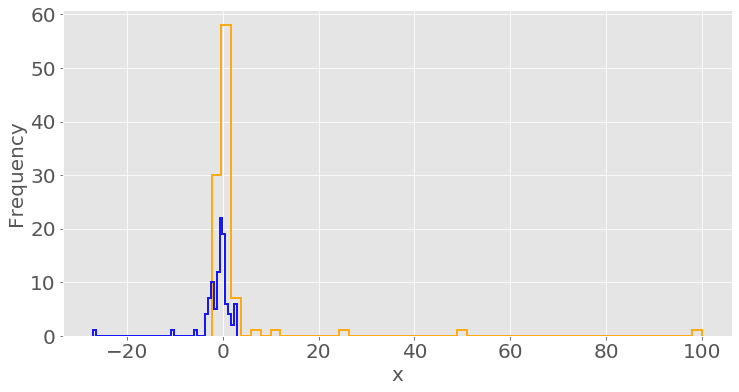

In [14]:
x, y,  binwidth, fig, ax = vis.nice_histogram(X, 50, show_plot=False)
x, y,  binwidth, fig, ax = vis.nice_histogram(X2, 50, show_plot=False, figure = fig, axis = ax, color_hist='blue')
fig

(0, 20)

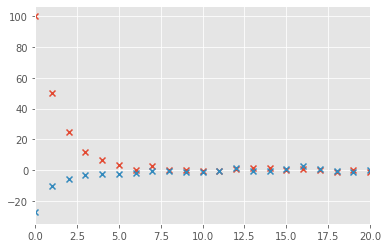

In [6]:
plt.scatter(np.arange(len_chain), X, marker='x')
plt.scatter(np.arange(len_chain), X2, marker='x')
plt.xlim(0,20)
#plt.yscale('log')

In [1]:
def f_prior(theta,a = 5 ,b = 17): return stats.beta.pdf(theta, a, b)
def f_lh(theta, k = 66, n = 100): return stats.binom.pmf(k, n, theta)
def f_posterior(theta): return f_prior(theta)*f_lh(theta) #no normalization so far
def f_proposal(mu = 0, sig = .3): return stats.norm.rvs(loc = mu, scale = sig)

In [2]:
def MC(post, prop, num_iter, theta0):
    Theta = np.empty(num_iter)
    theta = theta0
    for i in range(num_iter):
        theta_prop = proposal()
        rand = np.random.uniform()
        if post(theta_prop)/post(theta)>rand:
            theta = theta_prop
            Theta[i] = theta
        else:
            Theta[i] = theta
    
    return Theta

In [3]:
Theta = MC(f_posterior, f_proposal, 10000, .5)

NameError: name 'np' is not defined

In [ ]:
np.mean(Theta[2000:]), np.std(Theta[2000:])

In [ ]:
x, y, binwidth, fig, ax = vis.nice_histogram(Theta[2000:], 40,  plot_legend=False, show_plot=False, plot_hist=True, 
                                             data_label_hist= 'MC')
theta_x = np.linspace(0,1,100)
ax, fig = vis.nice_plot(theta_x, 100*f_prior(theta_x), axis = ax, figure = fig, data_label='prior*100')
ax, fig = vis.nice_plot(theta_x, 8000*f_lh(theta_x), axis = ax, figure = fig, data_label='lh*8000', color = 'limegreen')
ax, fig = vis.nice_plot(theta_x, 3e6*f_posterior(theta_x), axis = ax, figure = fig, 
                        data_label='posterior*3e6', color = 'r')
fig